# Ablation of REDQ Critic vs Double Q (Figure 11)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import utils

In [2]:
plt.rcParams["font.size"] = 19
plt.rcParams["legend.fontsize"] = 19

In [3]:
PALETTE = {
    "$N_q=5$": "#984ea3",
    "$N_q=2$": "#377eb8",
}

In [4]:
df = pd.read_csv("../data/ablations/redq-vs-double-q.csv")

In [5]:
# Convert env step to (1e3)
df.loc[:, "env_step"] = df["env_step"] // 1000

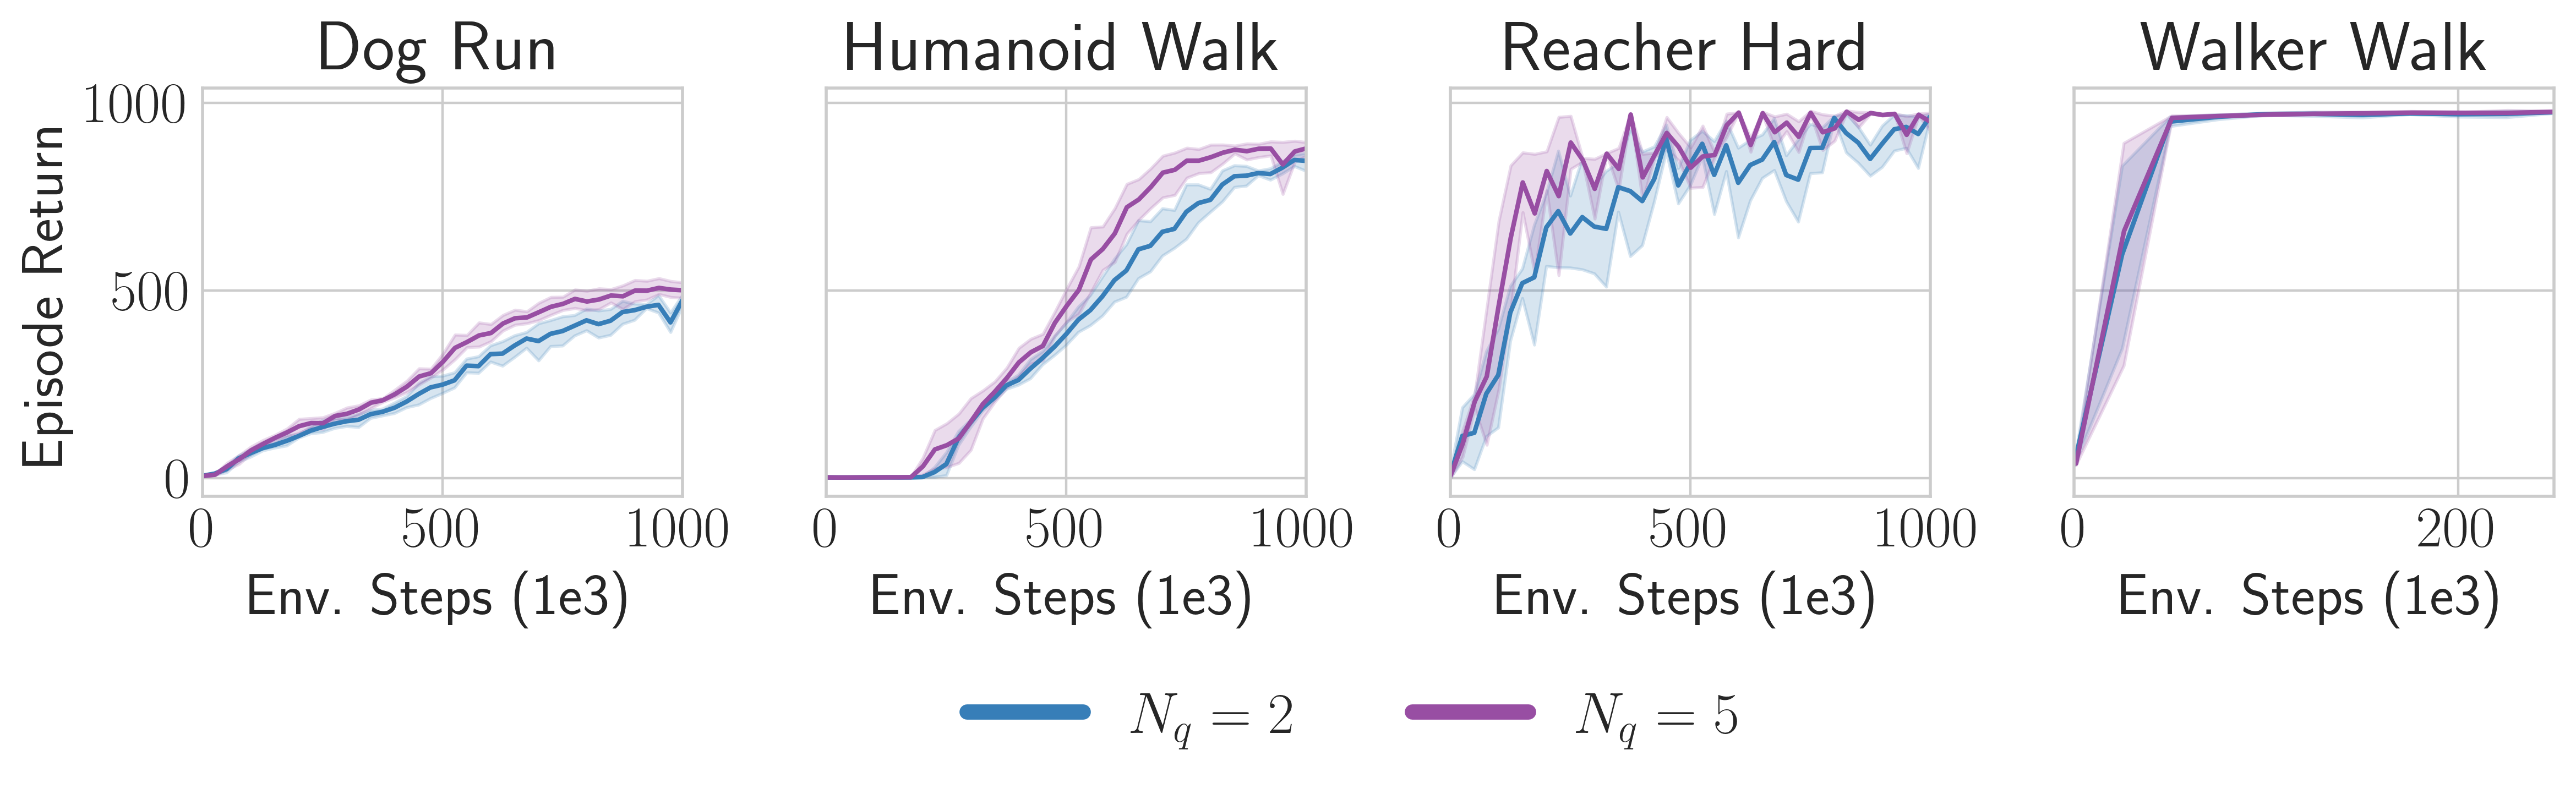

In [6]:
def plot_redq_vs_double_q(df, key="episode_reward"):
    ncol = 4
    nrow = 1
    fig, axs = plt.subplots(
        nrow,
        ncol,
        figsize=(3 * ncol, 3.5 * nrow),
        sharex="col",
        sharey="row",
    )

    for idx, env in enumerate(np.sort(df.env.unique())):
        data = df[df["env"] == env]
        col = idx % ncol
        ax = axs[col]
        hue_order = np.sort(data.agent.unique())
        legend = idx == len(df.env.unique()) - 1

        g = sns.lineplot(
            x="env_step",
            y=key,
            data=data,
            errorbar=("ci", 95),
            hue="agent",
            hue_order=hue_order,
            palette=PALETTE,
            legend="auto" if legend else False,
            ax=ax,
        )

        ax.set_title(" ".join([ele.capitalize() for ele in env.split("-")]))
        ax.set_xlabel("Env. Steps (1e3)")
        ax.set_ylabel("")
        if env in ["walker-walk"]:
            g.set(xlim=(0, 250))
        else:
            g.set(xlim=(0, 1000))
    axs[0].set_ylabel(utils.YLABELS[key])

    l = axs[-1].legend(
        loc="upper center",
        bbox_to_anchor=(-1.5, -0.35),
        fancybox=False,
        shadow=False,
        ncol=len(df.agent.unique()),
    )
    for line in l.get_lines():
        line.set_linewidth(5.0)
    fig.subplots_adjust(
        bottom=0.35,
        hspace=0.3,
        wspace=0.3,
        left=0.08,
        right=0.97,
        top=0.88,
    )

    plt.savefig(f"./figs/redq-vs-double-q-ablation.pdf")

plot_redq_vs_double_q(df)